## PCA的步骤

1.标准化

2.计算协方差矩阵

3.计算特征值和特征向量

4.特征值从大到小排列

5.保留最大的N个特征向量

6.数据转换到这N个特征向量代表的新空间中

In [1]:
import numpy as np

In [33]:
def loadDataSet(fileName, delim='\t'):
    data = np.loadtxt(fileName,dtype=np.float,delimiter=delim)
    return np.mat(data)

def replaceNanWithMean(): 
    datMat = loadDataSet('secom.data', ' ')
    numFeat = np.shape(datMat)[1]
    for i in range(numFeat):
        meanVal = np.mean(datMat[np.nonzero(~np.isnan(datMat[:,i].A))[0],i]) #values that are not NaN (a number)
        datMat[np.nonzero(np.isnan(datMat[:,i].A))[0],i] = meanVal  #set NaN values to mean
    return datMat

In [35]:
data=replaceNanWithMean()
data.shape
data

matrix([[  3.03093000e+03,   2.56400000e+03,   2.18773330e+03, ...,
           1.64749042e-02,   5.28333333e-03,   9.96700663e+01],
        [  3.09578000e+03,   2.46514000e+03,   2.23042220e+03, ...,
           2.01000000e-02,   6.00000000e-03,   2.08204500e+02],
        [  2.93261000e+03,   2.55994000e+03,   2.18641110e+03, ...,
           4.84000000e-02,   1.48000000e-02,   8.28602000e+01],
        ..., 
        [  2.97881000e+03,   2.37978000e+03,   2.20630000e+03, ...,
           8.60000000e-03,   2.50000000e-03,   4.35231000e+01],
        [  2.89492000e+03,   2.53201000e+03,   2.17703330e+03, ...,
           2.45000000e-02,   7.50000000e-03,   9.34941000e+01],
        [  2.94492000e+03,   2.45076000e+03,   2.19544440e+03, ...,
           1.62000000e-02,   4.50000000e-03,   1.37784400e+02]])

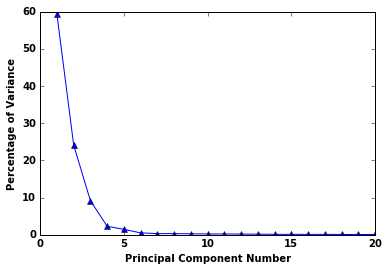

In [36]:
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

# 1.标准化
meanVals = np.mean(data, axis=0)
meanRemoved = data - meanVals #remove mean
# 2.计算协方差矩阵
covMat = np.cov(meanRemoved, rowvar=0)
# 3.计算特征值和特征向量
eigVals,eigVects = np.linalg.eig(np.mat(covMat))
#4.特征值从大到小排列
eigValInd = np.argsort(eigVals)            #sort, sort goes smallest to largest
eigValInd = eigValInd[::-1]#reverse
#5.保留最大的N个特征向量
sortedEigVals = eigVals[eigValInd]
total = sum(sortedEigVals)
varPercentage = sortedEigVals/total*100
# print varPercentage,varPercentage.shape
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(range(1, 21), varPercentage[:20], marker='^')
plt.xlabel('Principal Component Number')
plt.ylabel('Percentage of Variance')
plt.show()

In [39]:
def pca(dataMat, topNfeat=9999999):
    meanVals = np.mean(dataMat, axis=0)
    meanRemoved = dataMat - meanVals #remove mean
    covMat = np.cov(meanRemoved, rowvar=0)
    eigVals,eigVects = np.linalg.eig(np.mat(covMat))
    eigValInd = np.argsort(eigVals)            #sort, sort goes smallest to largest
    eigValInd = eigValInd[:-(topNfeat+1):-1]  #cut off unwanted dimensions
    redEigVects = eigVects[:,eigValInd]       #reorganize eig vects largest to smallest
    #6.数据转换到这N个特征向量代表的新空间中
    lowDDataMat = meanRemoved * redEigVects#transform data into new dimensions
    reconMat = (lowDDataMat * redEigVects.T) + meanVals
    return lowDDataMat, reconMat

In [40]:
lowDData ,reconMat = pca(data,6)

In [42]:
lowDData.shape

(1567L, 6L)